<a href="https://colab.research.google.com/github/Velarisme/GREEN-TECH-DATA/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('Mall_Customers.csv')

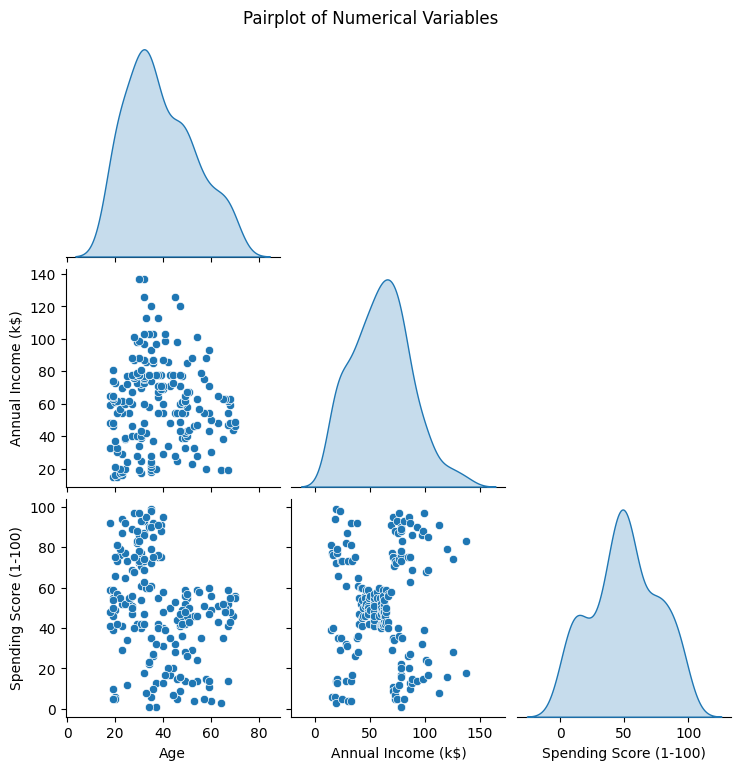

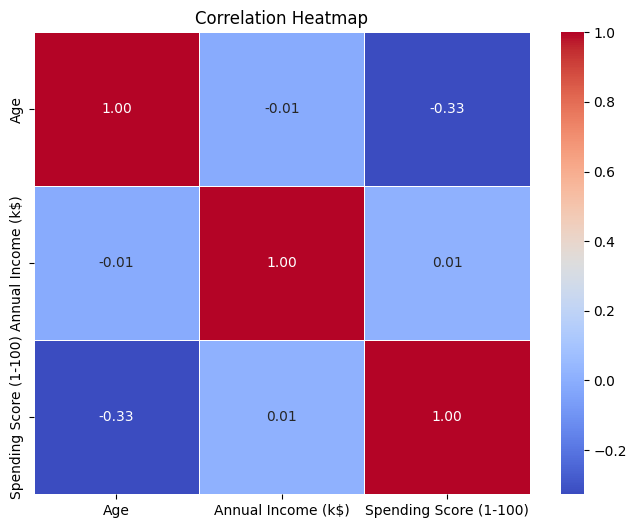

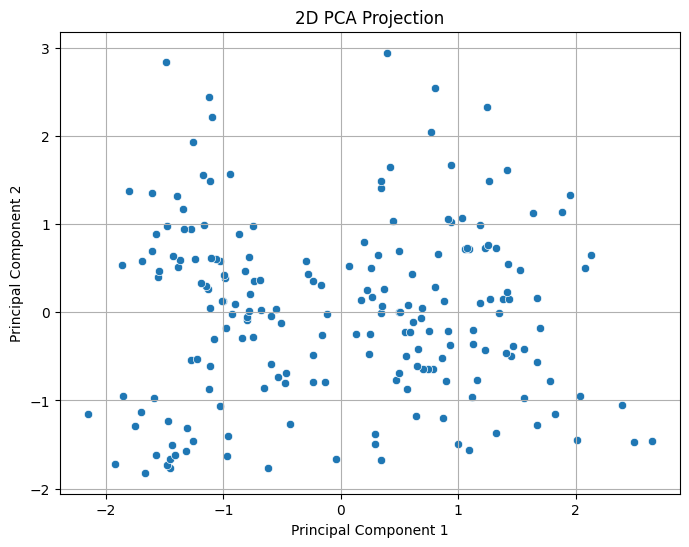

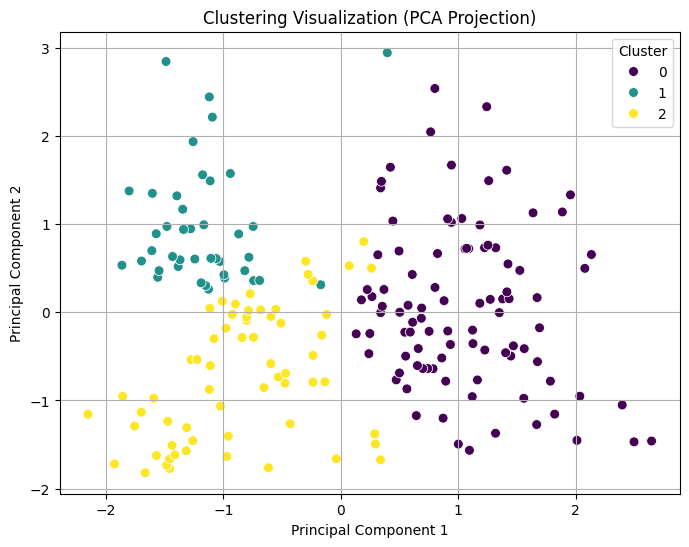

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select numerical columns for analysis
numerical_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 1: Pairplot to visualize pairwise relationships
sns.pairplot(numerical_data, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Step 2: Correlation heatmap
plt.figure(figsize=(8, 6))
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 3: PCA for dimensionality reduction (2D projection)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 4: Clustering visualization (using KMeans as an example)
from sklearn.cluster import KMeans

# Perform KMeans clustering with 3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_labels

# Scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50)
plt.title('Clustering Visualization (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


<ipython-input-7-cf5c946cd055>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mall_data, x='Gender', palette='pastel')


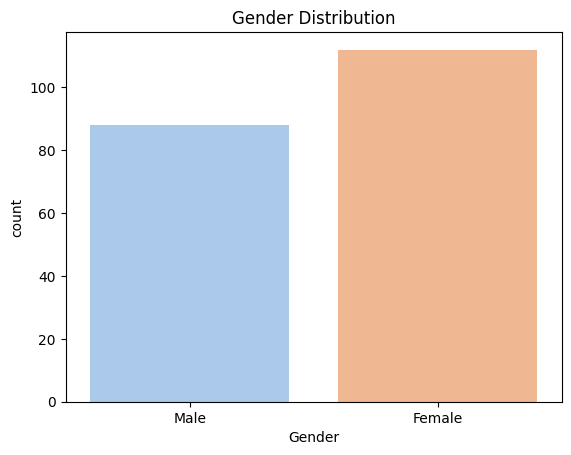

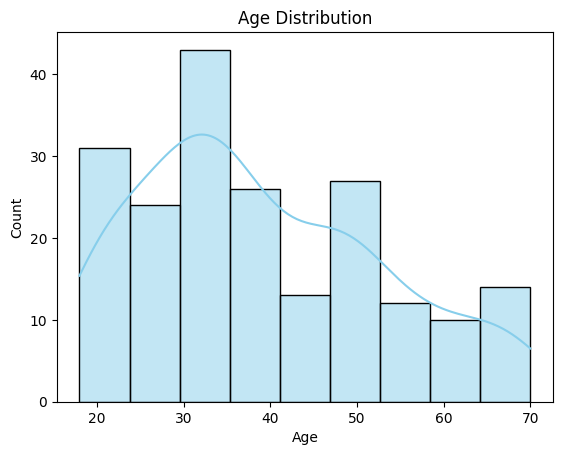

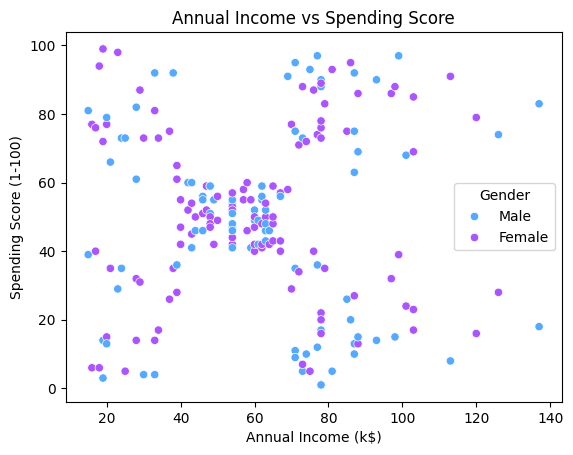

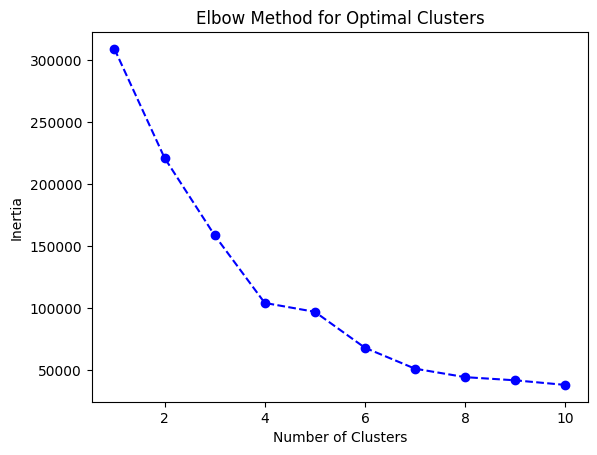

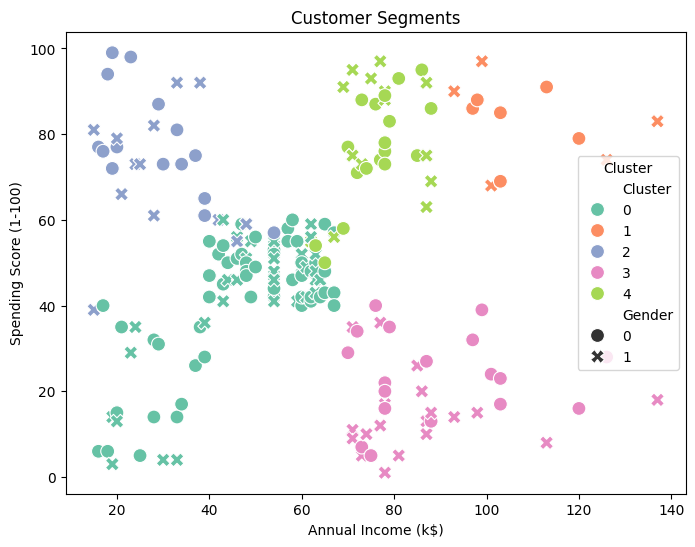

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


file_path = 'Mall_Customers.csv'
mall_data = pd.read_csv(file_path)

# Step 1: EDA
# Gender distribution
sns.countplot(data=mall_data, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()


sns.histplot(data=mall_data, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()


sns.scatterplot(data=mall_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='cool')
plt.title('Annual Income vs Spending Score')
plt.show()


encoder = LabelEncoder()
mall_data['Gender'] = encoder.fit_transform(mall_data['Gender'])  # Male: 1, Female: 0


X = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42)
mall_data['Cluster'] = kmeans.fit_predict(X)

# Step 4: Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=mall_data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    style='Gender',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [9]:
import pandas as pd

# Load the dataset into a DataFrame
file_path = "Mall_Customers.csv"  # Update with the correct path to your dataset
df = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


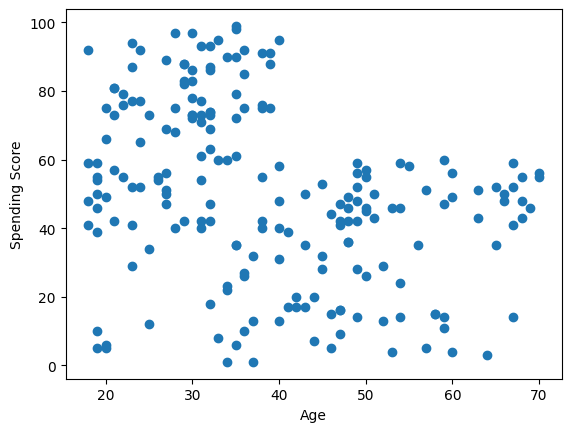

In [10]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

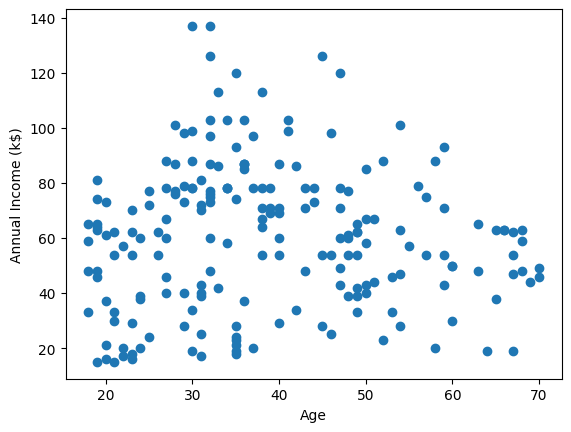

In [11]:
plt.scatter(df['Age'],df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

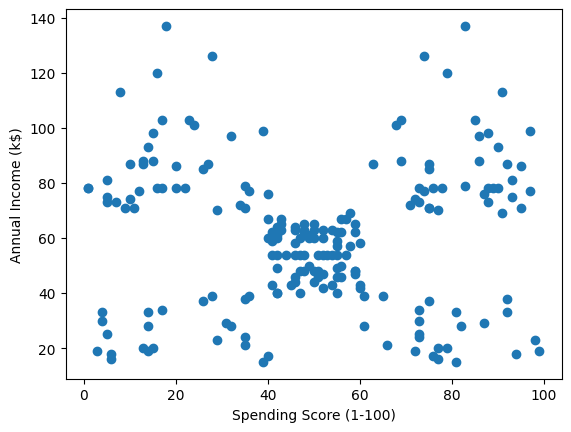

In [13]:
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.show()

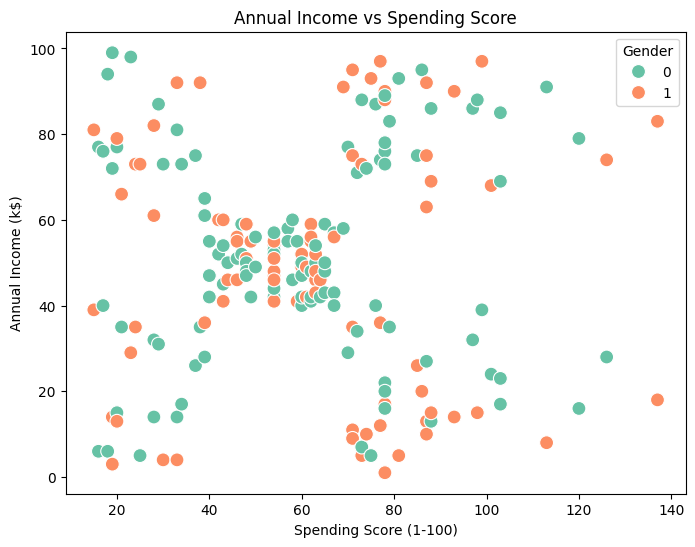

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=mall_data,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    palette='Set2',
    s=100
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend(title='Gender')
plt.show()

In [17]:
relevant_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
customer_df = df[relevant_cols]

In [18]:
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(customer_df)

StandardScaler()

In [22]:
scaled_data = scaler.transform(customer_df)

In [23]:
scaled_data


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [24]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

#measure of how tightly grouped the data points are within their clusters using elbow method. The inertia decreases as the number of clusters increases, but at some point, adding more clusters gives diminishing returns

In [25]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [26]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

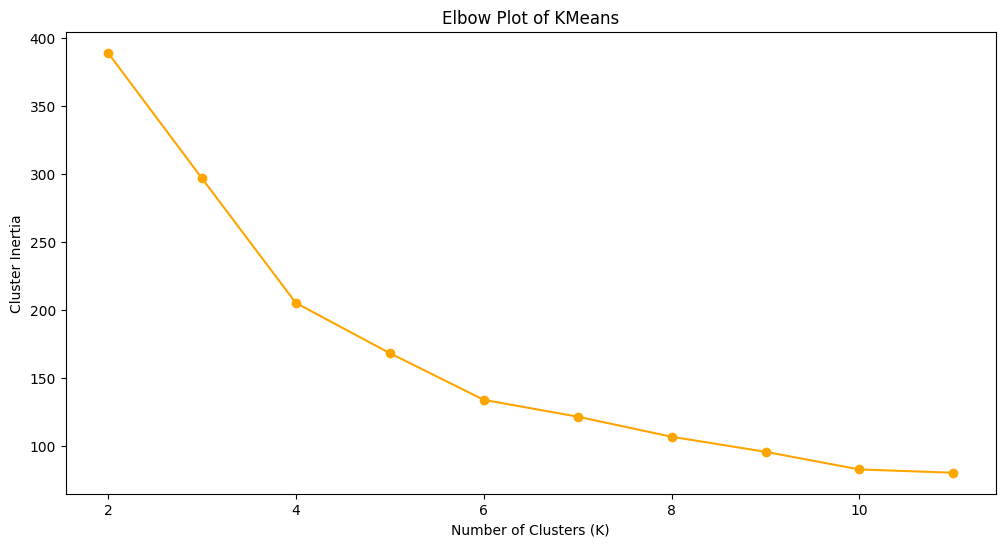

In [27]:
generate_elbow_plot(clusters_centers, k_values)

In [28]:
kmeans_model = KMeans(n_clusters = 5)

In [29]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [30]:
df["clusters"] = kmeans_model.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,4


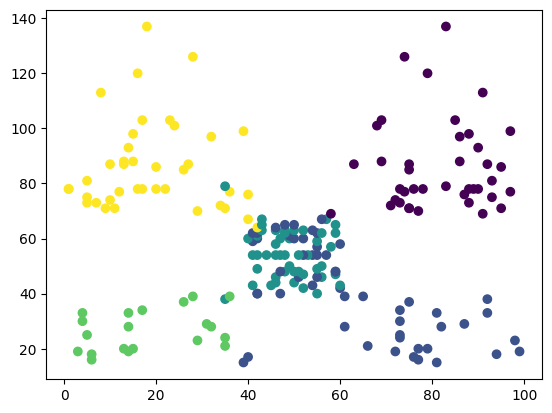

In [31]:
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c = df["clusters"]
            )